# 0. 준비단계

In [2]:
# 라이브러리 호출
import os
import numpy as np
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
# 현재 작업 경로 확인
os.getcwd()

'C:\\Users\\kim jeongah\\OneDrive\\Desktop\\DMF\\DBR_Project\\DBR_Project\\code'

In [4]:
# data 폴더로 작업 경로 변경
os.chdir(path = '../data')

In [5]:
# 현재 작업 경로에 있는 폴더명과 파일명 확인
os.listdir()

['22_Prep.pkl',
 '23_Prep.pkl',
 'df22.pkl',
 'df23.pkl',
 'Naver_News_List.pkl',
 'Naver_News_Reply.pkl',
 'Text_Prep.pkl']

In [6]:
# pkl 파일을 읽고 corpus, tfs 및 dtm 생성
# [참고] pkl 파일로 저장할 때 지정한 파이썬 객체의 개수만큼 변수를 지정해야 함
corpus, tfs, dtm = pd.read_pickle(filepath_or_buffer = '22_Prep.pkl')

In [7]:
# 현재 사용 중인 컴퓨터에 설치한 전체 폰트 파일명을 리스트로 반환
fontList = fm.findSystemFonts(fontext = 'ttf')

# fontList 확인
fontList

['C:\\Windows\\Fonts\\YuGothM.ttc',
 'C:\\Windows\\Fonts\\calibriz.ttf',
 'C:\\Windows\\Fonts\\framdit.ttf',
 'C:\\Windows\\Fonts\\SitkaVF.ttf',
 'C:\\Windows\\Fonts\\himalaya.ttf',
 'C:\\Windows\\Fonts\\comicbd.ttf',
 'C:\\Windows\\Fonts\\meiryo.ttc',
 'C:\\Windows\\Fonts\\BIZ-UDGothicB.ttc',
 'C:\\Windows\\Fonts\\constanb.ttf',
 'C:\\Windows\\Fonts\\couri.ttf',
 'C:\\Windows\\Fonts\\seguihis.ttf',
 'C:\\Windows\\Fonts\\malgunsl.ttf',
 'C:\\Windows\\Fonts\\msjh.ttc',
 'C:\\Windows\\Fonts\\georgiaz.ttf',
 'C:\\Windows\\Fonts\\ariali.ttf',
 'C:\\Windows\\Fonts\\BIZ-UDMinchoM.ttc',
 'C:\\Windows\\Fonts\\seguisbi.ttf',
 'C:\\Windows\\Fonts\\mmrtextb.ttf',
 'C:\\Windows\\Fonts\\msjhbd.ttc',
 'C:\\Windows\\Fonts\\georgiab.ttf',
 'C:\\Windows\\Fonts\\segoeprb.ttf',
 'C:\\Windows\\Fonts\\msyhl.ttc',
 'C:\\Windows\\Fonts\\simsunb.ttf',
 'C:\\Windows\\Fonts\\msyh.ttc',
 'C:\\Windows\\Fonts\\ariblk.ttf',
 'C:\\Windows\\Fonts\\pala.ttf',
 'C:\\Windows\\Fonts\\seguisym.ttf',
 'C:\\Windows\\Fonts\\

In [8]:
# 리스트에서 특정 문자열(폰트명)을 포함하는 파일명 선택
fontPath = [font for font in fontList if 'batang' in font]

# fontPath 확인
fontPath

['C:\\Windows\\Fonts\\batang.ttc']

In [9]:
# 반복문으로 컴퓨터에 설치한 폰트명 출력
for font in fontPath:
    print(fm.FontProperties(fname = font).get_name())

Batang


In [10]:
# 한글폰트와 글자 크기 설정
# [참고] 폰트를 설치하고 .matplotlib 폴더에서 fontlist-v3xx.json 파일을 삭제해야 함
plt.rc(group = 'font', family = 'Batang', size = 10)

In [19]:
# 그래프 크기와 해상도 설정
plt.rc(group = 'figure', figsize = (8, 4), dpi = 100)

# 1. 고빈도 단어 시각화

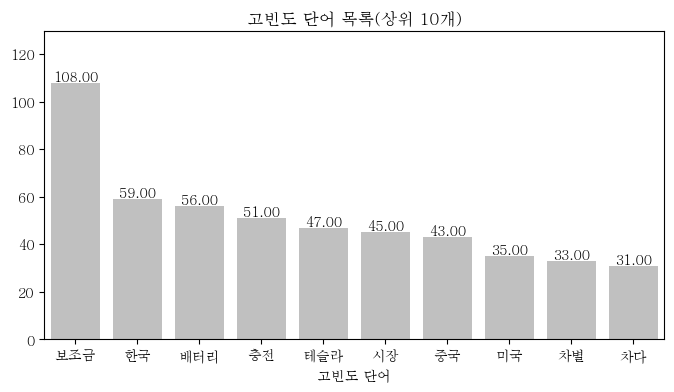

In [20]:
tfs_top10 = tfs.head(n = 10)
sns.barplot(x = tfs_top10.index, y = tfs_top10.values, color = 'silver')
plt.title(label = '고빈도 단어 목록(상위 10개)')
plt.xlabel(xlabel = '고빈도 단어')
plt.ylim(0, tfs_top10.max() * 1.2)
for i, v in enumerate(tfs_top10):
    plt.text(x = i, y = v, s = f'{v:.2f}', ha = 'center', va = 'bottom');

# 2. 워드 클라우드 시각화

In [21]:
freq = dict()

In [22]:
# 워드 클라우드 시각화용 딕셔너리 생성
# [참고] 키는 단어, 값은 단어의 도수임
for word in dtm.columns:
    freq[word] = dtm[word].sum()

In [23]:
# 컬러맵(팔레트) 목록 확인
# [참고] '_r'이 붙은 속성이 팔레트이며, '_r'은 reverse를 의미
dir(plt.cm)

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'ColormapRegistry',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Grays',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'Mapping',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'ScalarMappable',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 '_LUTSIZE',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '

In [24]:
# 워드 클라우드 객체 생성
wc = WordCloud(
    font_path = fontPath[0],
    width = 800, 
    height = 800, 
    background_color = 'black', 
    colormap = 'Pastel1'
)

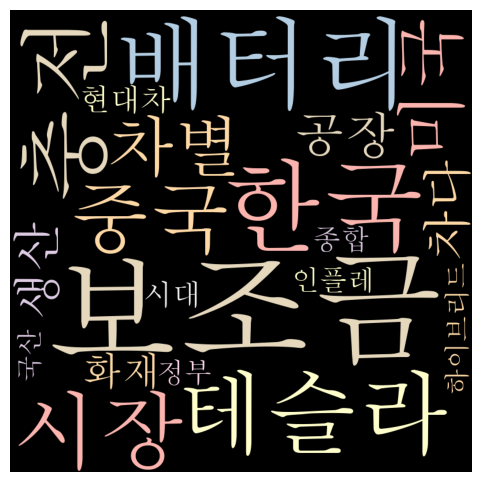

In [25]:
# 워드 클라우드를 시각화
plt.figure(figsize = (6, 6), dpi = 100)
wcgf = wc.generate_from_frequencies(frequencies = freq)
plt.imshow(X = wcgf)
plt.axis('off')
plt.show()

# 3. 연관 단어 시각화

In [11]:
# 단어 간 상관계수 행렬 생성
# [참고] 열(차원) 개수가 많을수록 오래 걸림
corMat = dtm.corr().round(4)

In [12]:
# corMat의 일부 확인
corMat.iloc[0:10, 0:10]

,공장,국산,미국,배터리,보조금,생산,시대,시장,인플레,정부
공장,1.0000,0.0066,0.1108,-0.0054,-0.0597,0.0268,-0.0357,-0.0214,-0.0342,0.0029
국산,0.0066,1.0000,0.0406,-0.0155,0.0703,-0.0332,0.0148,-0.0071,0.0647,-0.0257
미국,0.1108,0.0406,1.0000,-0.0361,0.0916,0.0534,-0.0393,0.0262,0.0355,0.0640
배터리,-0.0054,-0.0155,-0.0361,1.0000,-0.0816,-0.0038,-0.0505,0.0592,-0.0190,-0.0429
보조금,-0.0597,0.0703,0.0916,-0.0816,1.0000,-0.0600,-0.0720,-0.0979,0.1481,0.0159
생산,0.0268,-0.0332,0.0534,-0.0038,-0.0600,1.0000,-0.0363,-0.0208,-0.0348,-0.0309
시대,-0.0357,0.0148,-0.0393,-0.0505,-0.0720,-0.0363,1.0000,-0.0137,-0.0316,0.0101
시장,-0.0214,-0.0071,0.0262,0.0592,-0.0979,-0.0208,-0.0137,1.0000,-0.0430,-0.0382
인플레,-0.0342,0.0647,0.0355,-0.0190,0.1481,-0.0348,-0.0316,-0.0430,1.0000,0.0526
정부,0.0029,-0.0257,0.0640,-0.0429,0.0159,-0.0309,0.0101,-0.0382,0.0526,1.0000


In [13]:
# 키워드 연관 단어로 막대 그래프를 그리는 함수 생성
def plot_assocs(keyword, n = 10, pal = 'Greys_r'):
    assocs = corMat[keyword].sort_values(ascending = False).head(n = n+1).iloc[1:]
    sns.barplot(x = assocs.index, y = assocs.values, hue = assocs.index, palette = pal)
    plt.title(label = '연관 단어 목록')
    plt.xlabel(xlabel = '고빈도 단어')
    plt.ylim(0, 1.0)
    for i, v in enumerate(assocs):
        plt.text(x = i, y = v, s = f'{v:.2f}', ha = 'center', va = 'bottom')

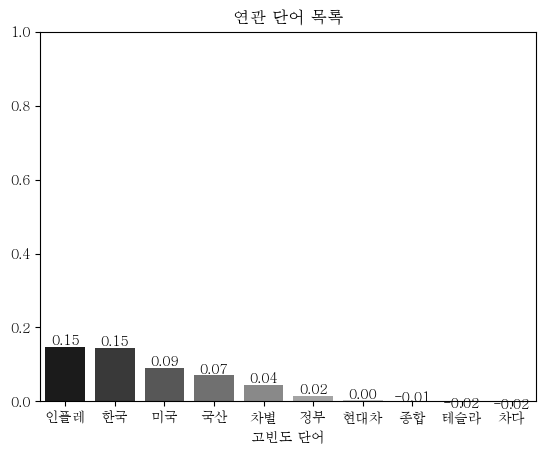

In [14]:
# 연관 단어를 반환하는 함수 테스트
plot_assocs(keyword = '보조금')

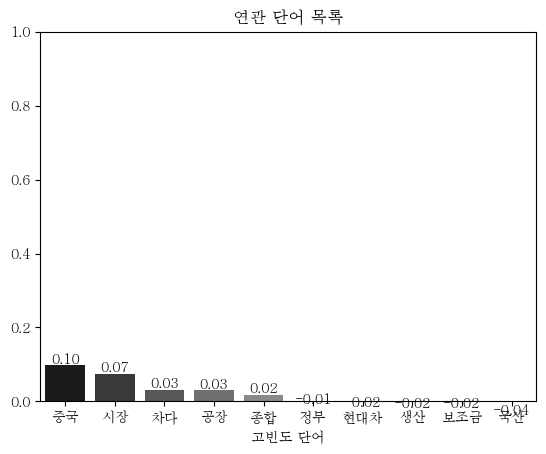

In [15]:
# 연관 단어를 반환하는 함수 테스트
plot_assocs(keyword = '테슬라')

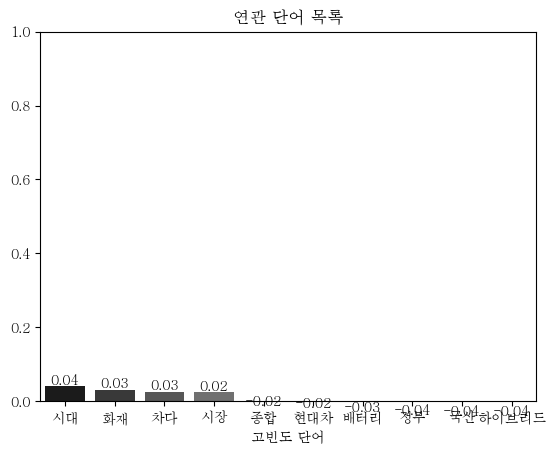

In [16]:
# 연관 단어를 반환하는 함수 테스트
plot_assocs(keyword = '충전')